![image.png]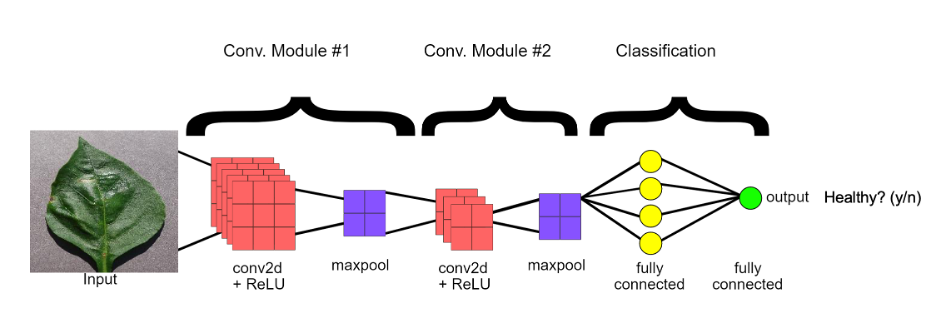

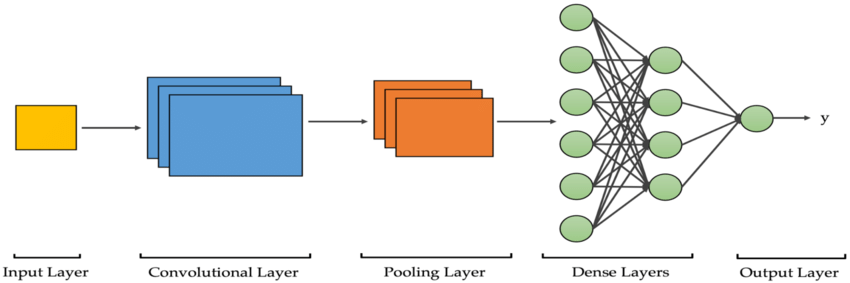

In [1]:
import glob
import os
import cv2
import shutil
import random

from numpy import asarray 
import numpy as np

import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

In [12]:
### Reading Images
imgpath="PlantVillage/"

label_dict={0:'Pepper__bell___Bacterial_spot'
            ,1:'Pepper__bell___healthy',
            2:'Potato___Early_blight',
            3:'Potato___Late_blight',
            4:'Potato___healthy',
            5:'Tomato_Bacterial_spot',
            6:'Tomato_Early_blight',
            7:'Tomato_Late_blight',
            8:'Tomato_Leaf_Mold',
            9: 'Tomato_Septoria_leaf_spot',
            10:'Tomato_Spider_mites_Two_spotted_spider_mite',
            11: 'Tomato__Target_Spot',
            12: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
            13:'Tomato__Tomato_mosaic_virus',
            14:'Tomato_healthy'}


batch_size = 32
nb_epochs = 5
num_folds=3

In [13]:
categories=os.listdir(imgpath)
ListofImages=[]
sorted(categories)

for category in categories:
    class_num=categories.index(category)
    for img in os.listdir(imgpath+category):
        if img.endswith('.jpg') or img.endswith('.JPG'):
            img_array=cv2.imread(imgpath+category+'/'+img)
            newImg_array=cv2.resize(img_array,(64,64))
            ListofImages.append([newImg_array, class_num])


In [14]:
ListofImages[0][1]

0

In [15]:
print(categories)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [16]:
random.shuffle(ListofImages)

In [17]:
X=[]
y=[]
for binimg, lbl in ListofImages:
    X.append(binimg)
    y.append(lbl)


kfold = KFold(n_splits=num_folds, shuffle=True)

In [18]:
X=np.array(X)
y=np.array(y)

In [19]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X,y):
    
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation=tf.nn.relu,input_shape=(64,64,3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(15,  activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    print("==============================")
    print(f'Training for fold {fold_no} ...')
    
    history =model.fit(X[train],y[train], 
          batch_size = batch_size, epochs = nb_epochs, 
          verbose = 1)
    
    score,accuracy = model.evaluate(X[test],y[test], verbose = 1 )
    print("Score: ", score)
    print("accuracy: ", accuracy)
    
    # Increase fold number
    fold_no = fold_no + 1
        

Training for fold 1 ...
Epoch 1/5
430/430 [==============================] - 48s 112ms/step - loss: 3.3443 - accuracy: 0.3242
Epoch 2/5
430/430 [==============================] - 50s 116ms/step - loss: 1.6073 - accuracy: 0.5016
Epoch 3/5
430/430 [==============================] - 50s 115ms/step - loss: 1.2512 - accuracy: 0.5988
Epoch 4/5
430/430 [==============================] - 50s 115ms/step - loss: 1.0622 - accuracy: 0.6626
Epoch 5/5
215/215 [==============================] - 7s 30ms/step - loss: 0.8198 - accuracy: 0.7273
Score:  0.8197925686836243
accuracy:  0.7272859215736389
Training for fold 2 ...
Epoch 1/5
430/430 [==============================] - 51s 117ms/step - loss: 3.6903 - accuracy: 0.2884
Epoch 2/5
430/430 [==============================] - 52s 120ms/step - loss: 1.8758 - accuracy: 0.4044
Epoch 3/5
430/430 [==============================] - 53s 124ms/step - loss: 1.6875 - accuracy: 0.4625
Epoch 4/5
430/430 [==============================] - 51s 118ms/step - loss: 1.488

[3.6749508380889893, 1.7110681533813477, 1.4754698276519775, 1.1781491041183472, 0.9798020720481873]


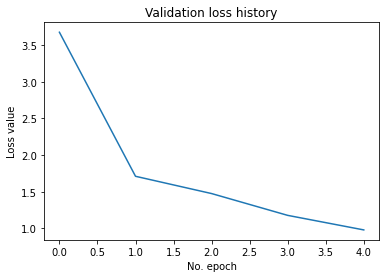

In [20]:
# Visualize history
# Plot history: Loss
print(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()





[0.30077046155929565, 0.45377233624458313, 0.5310364961624146, 0.6290158629417419, 0.6835295557975769]


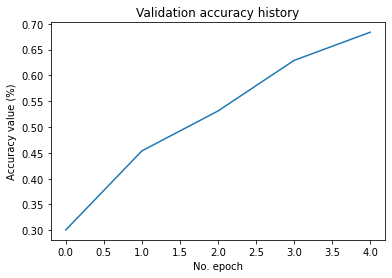

In [21]:
# Plot history: Accuracy
print(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()